### Prophet exercise

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
from prophet import Prophet

In [3]:
# load data
wmt = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/intro_to_prophet/master/data/WMT.csv')

* Explore the dataset

In [4]:
wmt.describe()

,Open,High,Low,Close,Adj Close,Volume
count,11815.000000,11815.000000,11815.000000,11815.000000,11815.000000,1.181500e+04
mean,29.942336,30.226543,29.658511,29.948090,24.052813,7.510762e+06
std,29.802418,30.051176,29.566506,29.811830,26.403796,6.327371e+06
min,0.015625,0.015625,0.014404,0.015625,0.005798,0.000000e+00
25%,1.265625,1.281250,1.253906,1.265625,0.513472,3.753600e+06
50%,13.718750,13.843750,13.562500,13.687500,8.964169,6.263200e+06
75%,54.000000,54.570000,53.500000,54.000000,40.389094,9.515000e+06
max,111.489998,112.220001,111.029999,111.599998,111.599998,1.318336e+08


In [5]:
wmt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.023768,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.023678,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.023408,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.023408,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.023047,870400


* use only the `Date` and `Adj Close` columns

In [7]:
df = wmt[['Date', 'Adj Close']]
df.head()

,Date,Adj Close
0,1972-08-25,0.023768
1,1972-08-28,0.023678
2,1972-08-29,0.023408
3,1972-08-30,0.023408
4,1972-08-31,0.023047


* rename columns to fit the Prophet naming convention

In [9]:
df.columns = ['ds', 'y']
df

,ds,y
0,1972-08-25,0.023768
1,1972-08-28,0.023678
2,1972-08-29,0.023408
3,1972-08-30,0.023408
4,1972-08-31,0.023047
...,...,...
11810,2019-06-26,110.160004
11811,2019-06-27,110.099998
11812,2019-06-28,110.489998
11813,2019-07-01,110.620003


* convert date to datetime

In [11]:
df.ds = pd.to_datetime(df.ds)
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

* plot time-series

<AxesSubplot:xlabel='ds'>

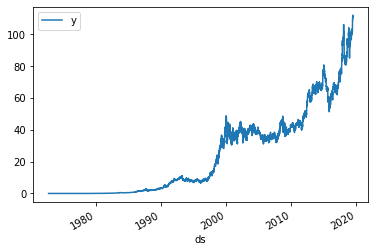

In [13]:
df.plot(x = 'ds')

* instantiate Prophet

In [14]:
m = Prophet()

* fit model

In [15]:
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -562.06
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       32305.1      0.038557         24170           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       33330.4     0.0262864       9478.06           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       33541.8    0.00396014       742.089      0.1606      0.8206      335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       33737.8     0.0184135       3994.74           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       33817.3   0.000551215       1291.71           1           1      558   
    Iter      log prob        ||dx||      ||grad||       alpha   

* forecast 365 values into the future 

In [23]:
future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)

* plot forecast

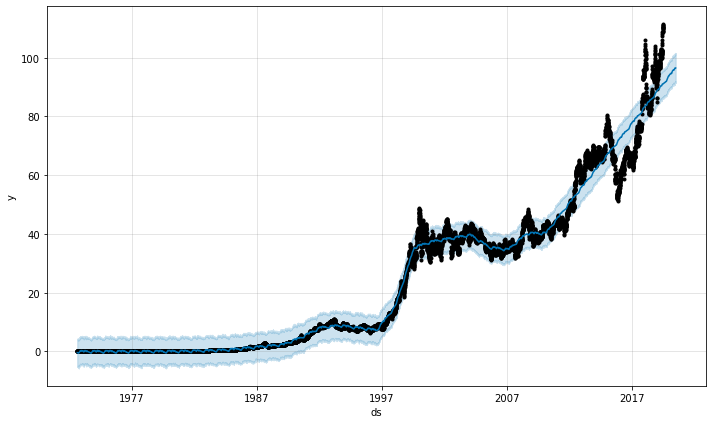

In [24]:
fig1 = m.plot(forecast)

* plot components

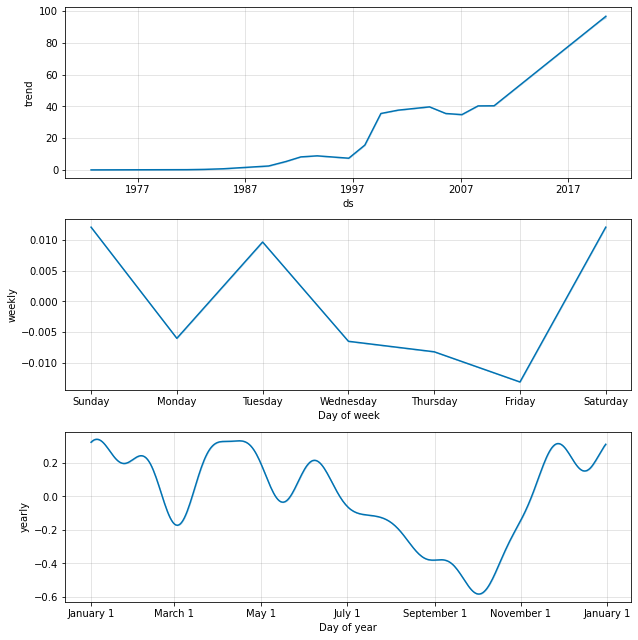

In [21]:
fig2 = m.plot_components(forecast)

- Compare the Prophet prediction vs the Arima prediction. Use the last 7 values we have in the timeseries as your test data.